In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc = {'figure.figsize' : (10, 6)})

# Дополнительные материалы

## Временная сложность алгоритма

In [3]:
# алгоритм линейного поиска
def linear(arr, x):

  # объявим счетчик количества операций
  counter = 0

  for i in range(len(arr)):

    # с каждой итерацией будем увеличивать счетчик на единицу
    counter += 1

    if arr[i] == x:
      return i, counter

In [4]:
# алгоритм бинарного поиска
def binary(arr, x):

  # объявим счетчик количества операций
  counter = 0

  low, high = 0, len(arr) - 1

  while low <= high:

    # увеличиваем счетчик с каждой итерацией цикла
    counter += 1

    mid = low + (high - low) // 2

    if arr[mid] == x:
        return mid, counter

    elif arr[mid] < x:
        low = mid + 1

    else:
        high = mid - 1

  return -1

In [5]:
# возьмем два массива из восьми и шестнадцати чисел
arr8 = np.array([3, 4, 7, 11, 13, 21, 23, 28])
arr16 = np.array([3, 4, 7, 11, 13, 21, 23, 28, 29, 30, 31, 33, 36, 37, 39, 42])

len(arr8), len(arr16)

(8, 16)

In [6]:
# найдем числа 28 и 42 с помощью линейного поиска
# первым результатом функции будет индекс искомого числа,
# вторым - количество операций сравнения
linear(arr8, 28), linear(arr16, 42)

((7, 8), (15, 16))

In [7]:
# найдем эти же числа с помощью бинарного поиска
binary(arr8, 28), binary(arr16, 42)

((7, 4), (15, 5))

In [8]:
# посчитаем количество операций для входных массивов разной длины
# создадим списки, куда будем записывать количество затраченных итераций
ops_linear, ops_binary = [], []

# будет 100 входных массивов длиной от 1 до 100 элементов
input_arr = np.arange(1, 101)

# на каждой итерации будем работать с массивом определенной длины
for i in input_arr:

  # внутри функций поиска создадим массив из текущего количества элементов
  # и попросим найти последний элемент i - 1
  _, l = linear(np.arange(i), i - 1)
  _, b = binary(np.arange(i), i - 1)

  # запишем количество затраченных операций в соответствующий список
  ops_linear.append(l)
  ops_binary.append(b)

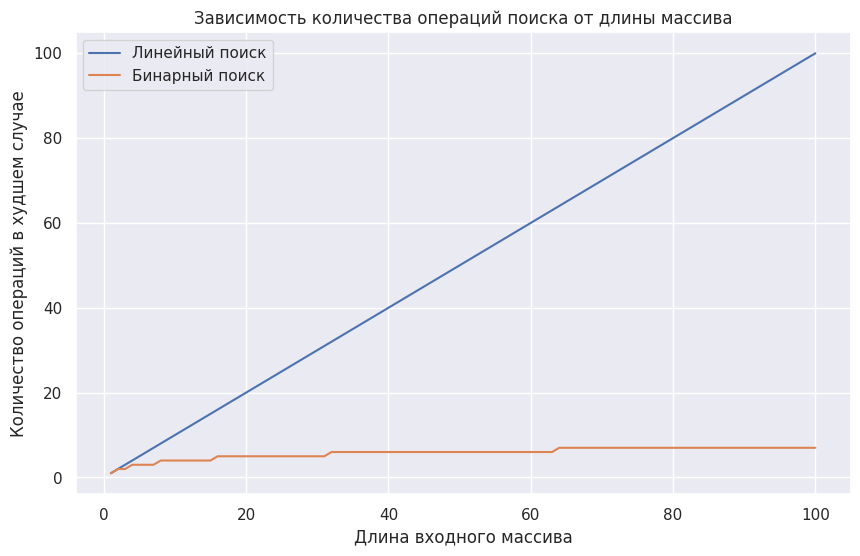

In [9]:
# выведем зависимость количества операций от длины входного массива
plt.plot(input_arr, ops_linear, label = 'Линейный поиск')
plt.plot(input_arr, ops_binary, label = 'Бинарный поиск')

plt.title('Зависимость количества операций поиска от длины массива')
plt.xlabel('Длина входного массива')
plt.ylabel('Количество операций в худшем случае')

plt.legend();

## Ещё одно сравнение методов заполнения пропусков

### Создание данных с пропусками

In [10]:
# импортируем данные опухолей из модуля datasets библиотеки sklearn
from sklearn.datasets import load_breast_cancer

# выведем признаки и целевую переменную и поместим их в X_full и _ соответственно
X_full, _ = load_breast_cancer(return_X_y = True, as_frame = True)

from sklearn.preprocessing import StandardScaler

# масштабируем данные
X_full = pd.DataFrame(StandardScaler().fit_transform(X_full), columns = X_full.columns)

In [11]:
# напишем функцию, которая будет случайным образом
# добавлять пропуски в выбранные нами признаки

# нам понадобится модуль random
import random

# на вход функция будет получать полный датафрейм, номера столбцов признаков,
# долю пропусков в каждом из столбцов и точку отсчета
def add_nan(x_full, features, nan_share = 0.2, random_state = None):

  random.seed(random_state)

  # сделаем копию датафрейма
  x_nan = x_full.copy()

  # вначале запишем количество наблюдений и количество признаков
  n_samples, n_features = x_full.shape

  # посчитаем количество признаков в абсолютном выражении
  how_many = int(nan_share * n_samples)

  # в цикле пройдемся по номерам столбцов
  for f in range(n_features):
    # если столбец был указан в параметре features,
    if f in features:
      # случайным образом отберем необходимое количество индексов наблюдений (how_many)
      # из перечня, длиной с индекс (range(n_samples))
      mask = random.sample(range(n_samples), how_many)
      # заменим соответствующие значения столбца пропусками
      x_nan.iloc[mask, f] = np.nan

  # выведем датафрейм с пропусками
  return x_nan

In [12]:
# выведем пять чисел от 0 до 9
random.seed(42)
# с функцией random.sample() повторов не будет
random.sample(range(10), 5)

[1, 0, 4, 9, 6]

In [13]:
# если использовать np.random.randint() будут повторы
np.random.seed(42)
# выберем случайным образом пять чисел от 0 до 9
np.random.randint(0, 10, 5)

array([6, 3, 7, 4, 6])

In [14]:
# то же самое с функцией random.choice()
random.seed(42)
# выберем пять случайных чисел от 0 до 9
[random.choice(range(10)) for _ in range(5)]

[1, 0, 4, 3, 3]

In [15]:
# создадим 20 процентов пропусков в первом столбце
X_nan = add_nan(X_full,
                features = [0],
                nan_share = 0.2,
                random_state = 42)

In [16]:
# проверим результат
(X_nan.isna().sum() / len(X_nan)).round(2)

,0
mean radius,0.2
mean texture,0.0
mean perimeter,0.0
mean area,0.0
mean smoothness,0.0
mean compactness,0.0
mean concavity,0.0
mean concave points,0.0
mean symmetry,0.0
mean fractal dimension,0.0


### Заполнение пропусков

Заполнение константой

In [17]:
# скопируем датасет
fill_const = X_nan.copy()
# заполним пропуски нулем
fill_const.fillna(0, inplace = True)
# убедимся, что пропусков не осталось
fill_const.isnull().sum().sum()

0

Заполнение медианой

In [18]:
# скопируем датасет
fill_median = X_nan.copy()
# заполним пропуски медианой
# по умолчанию, и .fillna(), и .median() работают со столбцами
fill_median.fillna(fill_median.median(), inplace = True)
# убедимся, что пропусков не осталось
fill_const.isnull().sum().sum()

0

Заполнение линейной регрессией

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# передадим функции датафрейм, а также название столбца с пропусками
def linreg_imputer(df, col):

  # обучающей выборкой будут строки без пропусков
  train = df.dropna().copy()
  # тестовой (или вернее выборкой для заполнения пропусков)
  # будут те строки, в которых пропуски есть
  test = df[df[col].isnull()].copy()

  # выясним индекс столбца с пропусками
  col_index = df.columns.get_loc(col)

  # разделим "целевую переменную" и "признаки"
  # обучающей выборки
  y_train = train[col]
  X_train = train.drop(col, axis = 1)

  # из "тестовой" выборки удалим столбец с пропусками
  test = test.drop(col, axis = 1)

  # обучим модель линейной регрессии
  model = LinearRegression()
  model.fit(X_train, y_train)

  # сделаем прогноз пропусков
  y_pred = model.predict(test)
  # вставим пропуски (value) на изначальное место (loc) столбца с пропусками (column)
  test.insert(loc = col_index, column = col, value = y_pred)

  # соединим датасеты и обновим индекс
  df = pd.concat([train, test])
  df.sort_index(inplace = True)

  return df

In [21]:
fill_linreg = X_nan.copy()
fill_linreg = linreg_imputer(X_nan, 'mean radius')
fill_linreg.isnull().sum().sum()

0

MICE

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [23]:
fill_mice = X_nan.copy()
mice_imputer = IterativeImputer(initial_strategy = 'mean', # вначале заполним пропуски средним арифметическим
                                estimator = LinearRegression(), # в качестве модели используем линейную регрессию
                                random_state = 42 # добавим точку отсчета
                                )

# используем метод .fit_transform() для заполнения пропусков
fill_mice = pd.DataFrame(mice_imputer.fit_transform(fill_mice), columns = fill_mice.columns)
fill_linreg.isnull().sum().sum()

0

KNNImputer

In [24]:
from sklearn.impute import KNNImputer

In [25]:
fill_knn = X_nan.copy()

# используем те же параметры, что и раньше: пять "соседей" с одинаковыми весами
knn_imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')

fill_knn = pd.DataFrame(knn_imputer.fit_transform(fill_knn), columns = fill_knn.columns)
fill_knn.isnull().sum().sum()

0

### Оценка качества

In [26]:
# напишем функцию, которая считает сумму квадратов отклонений
# заполненного значения от исходного
def nan_mse(X_full, X_nan):
  return ((X_full - X_nan) ** 2).sum().sum().round(2)

In [27]:
# создадим списки с датасетами и названиями методов
imputer = [fill_const, fill_median, fill_linreg, fill_mice, fill_knn]
name = ['constant', 'median', 'linreg', 'MICE', 'KNNImputer']

In [28]:
# в цикле оценим качество каждого из методов и выведем результат
for i, n in zip(imputer, name):
  score = nan_mse(X_full, i)
  print(n + ': ' + str(score))

constant: 122.7
median: 137.04
linreg: 0.03
MICE: 0.03
KNNImputer: 9.77


## Сериализация и десериализация

### JSON

#### Простой пример

In [29]:
# импортируем модуль json,
import json
# функцию urlopen() из модуля для работы с URL-адресами,
from urllib.request import urlopen
# а также функцию pprint() одноименной библиотеки
from pprint import pprint

url = 'https://random-data-api.com/api/v2/banks'

# получаем ответ (response) в формате JSON
with urlopen(url) as response:
  # считываем его и закрываем объект response
  data = response.read()

# данные пришли в виде последовательности байтов
print(type(data))
print()
# выполняем десериализацию
output = json.loads(data)
pprint(output)
print()
# и смотрим на получившийся формат
print(type(output))

<class 'bytes'>

{'account_number': '7946416120',
 'bank_name': 'ABN AMRO MEZZANINE (UK) LIMITED',
 'iban': 'GB16TCVO78447087339452',
 'id': 8019,
 'routing_number': '635752684',
 'swift_bic': 'BCYPGB2LHHB',
 'uid': '7665b887-47e9-49ee-bed3-95b9e79bc7cd'}

<class 'dict'>


#### Вложенный словарь и список словарей

In [30]:
# создадим вложенные словари
sales = {
    'PC' : {
        'Lenovo' : 3,
        'Apple'  : 2
        },
    'Phone' : {
        'Apple': 2,
        'Samsung': 5
        }
}

# и список из словарей
students = [
    {
        'id': 1,
        'name': 'Alex',
        'math': 5,
        'computer science': 4
     },
     {
        'id': 2,
        'name': 'Mike',
        'math': 4,
        'computer science': 5
      }
]

#### dumps()/loads()

In [31]:
# преобразуем вложенный словарь в JSON
# дополнительно укажем отступ (indent)
json_sales = json.dumps(sales, indent = 4)

print(json_sales)
print(type(json_sales))

{
    "PC": {
        "Lenovo": 3,
        "Apple": 2
    },
    "Phone": {
        "Apple": 2,
        "Samsung": 5
    }
}
<class 'str'>


In [32]:
# восстановим словарь
sales = json.loads(json_sales)
print(sales)
print(type(sales))

{'PC': {'Lenovo': 3, 'Apple': 2}, 'Phone': {'Apple': 2, 'Samsung': 5}}
<class 'dict'>


#### dump()/load()

In [33]:
# создадим файл students.json и откроем его для записи
with open('/content/students.json', 'w') as wf:
  # поместим туда students, преобразовав в JSON
  json.dump(students, wf, indent = 4)

In [34]:
# прочитаем файл из сессионного хранилища
with open('/content/students.json', "rb") as rf:
  # и преобразуем обратно в список из словарей
  students_out = json.load(rf)

In [35]:
students_out

[{'id': 1, 'name': 'Alex', 'math': 5, 'computer science': 4},
 {'id': 2, 'name': 'Mike', 'math': 4, 'computer science': 5}]

In [36]:
# обратите внимание, результат десериализации - это новый объект
print(students == students_out)
print(students is students_out)

True
False


#### JSON и Pandas

In [37]:
# импортируем датасет и преобразуем в датафрейм
from sklearn.datasets import load_breast_cancer
cancer, _ = load_breast_cancer(return_X_y = True, as_frame = True)

# создадим JSON-файл, поместим его в сессионное хранилище
cancer.to_json('/content/cancer.json')

# и сразу импортируем его и создадим датафрейм
pd.read_json('/content/cancer.json').head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### pickle

In [38]:
import pickle

#### dumps()/loads()

In [39]:
# создадим объект pickle
sales_pickle = pickle.dumps(sales)

print(sales_pickle)
print(type(sales_pickle))

b'\x80\x04\x95?\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x02PC\x94}\x94(\x8c\x06Lenovo\x94K\x03\x8c\x05Apple\x94K\x02u\x8c\x05Phone\x94}\x94(h\x04K\x02\x8c\x07Samsung\x94K\x05uu.'
<class 'bytes'>


In [40]:
# восстановим исходный тип данных
sales_out = pickle.loads(sales_pickle)

print(sales_out)
print(type(sales_out))

{'PC': {'Lenovo': 3, 'Apple': 2}, 'Phone': {'Apple': 2, 'Samsung': 5}}
<class 'dict'>


In [41]:
# результат десериализации - также новый объект
print(sales == sales_out)
print(sales is sales_out)

True
False


#### dump()/load()

In [42]:
# создадим файл students.p
# и откроем его для записи в бинарном формате (wb)
with open('/content/students.p', 'wb') as wf:
  # поместим туда объект pickle
  pickle.dump(students, wf)

In [43]:
# достанем этот файл из сессионного хранилища
# и откроем для чтения в бинарном формате (rb)
with open('/content/students.p', 'rb') as rf:
  students_out = pickle.load(rf)

In [44]:
# выведем результат
students_out

[{'id': 1, 'name': 'Alex', 'math': 5, 'computer science': 4},
 {'id': 2, 'name': 'Mike', 'math': 4, 'computer science': 5}]

#### Собственные объекты

Функции

In [45]:
# создадим функцию, которая будет выводить надпись "Some function!"
def foo():
  print('Some function!')

# преобразуем эту функцию в объект Pickle
foo_pickle = pickle.dumps(foo)

# десериализуем и
foo_out = pickle.loads(foo_pickle)

# вызовем ее
foo_out()

Some function!


Классы

In [46]:
# создадим класс и объект этого класса
class CatClass:

  def __init__(self, color):
    self.color = color
    self.type_ = 'cat'

Matroskin = CatClass('gray')

In [47]:
# сериализуем класс в объект Pickle и поместим в файл
with open('cat_instance.pkl', 'wb') as wf:
  pickle.dump(Matroskin, wf)

In [48]:
# достанем из файла и десериализуем
with open('cat_instance.pkl', 'rb') as rf:
  Matroskin_out = pickle.load(rf)

In [49]:
# выведем атрибуты созданного нами объекта класса
Matroskin_out.color, Matroskin_out.type_

('gray', 'cat')

### Сохраняемость ML-модели

In [50]:
# импортируем датасет о раке груди
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

# импортируем класс для масштабирования данных,
from sklearn.preprocessing import MinMaxScaler
# функцию для разделения выборки на обучающую и тестовую части,
from sklearn.model_selection import train_test_split
# класс логистической регрессии
from sklearn.linear_model import LogisticRegression

# разделим выборку
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

# создадим объект класса MinMaxScaler
scaler = MinMaxScaler()

# масштабируем обучающую выборку
X_train_scaled = scaler.fit_transform(X_train)

# обучим модель на масштабированных train данных
model = LogisticRegression(random_state = 42).fit(X_train_scaled, y_train)

# используем минимальное и максимальное значения
# обучающей выборки для масштабирования тестовых данных
X_test_scaled = scaler.transform(X_test)

# сделаем прогноз
y_pred = model.predict(X_test_scaled)

In [51]:
# импортируем функцию для создания матрицы ошибок
from sklearn.metrics import confusion_matrix

# передадим матрице тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])

# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,107,1
1,5,58


In [53]:
from sklearn.metrics import accuracy_score

# рассчитаем accuracy
round(accuracy_score(y_test, y_pred),2)

0.96

In [54]:
# сериализуем и
with open('model.pickle', 'wb') as wf:
  pickle.dump(model, wf)

In [55]:
# десериализуем модель
with open('model.pickle', 'rb') as rf:
  model_out = pickle.load(rf)

In [56]:
# сделаем прогноз на десериализованной модели
# (напомню, это другой объект)
y_pred_out = model_out.predict(X_test_scaled)

# убедимся, что десериализованная модель покажет такой же результат
model_matrix = confusion_matrix(y_test, y_pred_out, labels = [1,0])

model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,107,1
1,5,58


In [58]:
round(accuracy_score(y_test, y_pred),2)

0.96